# Importar Paquetes

In [1]:
pkg load image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy.ndimage import sobel

# Localización de Bordes:
- La localización de bordes consiste en saber específicamente en que posición de la imagen se encuentra un borde en particular. Para esto utilizaremos la transformada de Hough.
      
# Transformada de Hough:
- Es una transformada que permite detectar figuras que son expresadas matemáticamente como *rectas*, circunferencias y elipses.

## Caso de Lineas Rectas
- En este caso, las lineas rectas se pueden expresar con la ecuación `y = mx + b`
- La idea principal es considerar las caracteristicas de una linea recta en términos de los parámetros (m,b)
- El problema de `y = mx + b` es que no puede localizar lineas verticales, Para eso utilizaremos una representación polar 
    - `y = -(cos(a)/sen(a))x + p/sen(a)`
    - donde p = distancia del origen a la recta y a = es el ángulo que hay entre p y el eje x
    
- Despejando p:
    - `p = x*cos(a) + y*sen(a)`
- Es posible asociar a cada recta un par (p,a) que es único para todo a que exista en [0, pi[, p existe en el dominio real

NOTA: El espacio (p,a) se denomina el espacio de Hough para el conjunto de rectas en 2 dimensiones

# Pasos de la Transformada de Hough
Sea A una imagen binaria donde, A(x,y){ 1 : si esta en el borde , 0: si no esta en el borde }
- Paso 1: Cargar una imagen I
- Paso 2: Detectar los borde de I y guardarlo en una imagen A (binaria)
- Paso 3: Para cada (x,y) que esté en el borde:
- Paso 4: -Para todos los posibles a en `[o,pi[`
- Paso 5: -- Calcular p para (x,y) y a
- Paso 6: -- Incrementar la posición (p,a) en la matriz de acumulación
- Paso 7: Buscar las posiciones con los mayores valores en el acumulador
- Paso 8: Devolver la recta cuyos valores son los mayores en el acumulador



In [3]:
clc; clear; close all

A = imread('images/linea1.jpg');

%Convertir la imagen en binaria
B = im2double(A);
B(B<0.5) = 0;
B(B>=0.5) = 1;
# imshow(B)

%Calcular la discretización de theta y rho
%1. Discretización de Theta: Toma valores en [0,180] / [0,pi]
h1 = 1;
thetas = deg2rad(0:h1:180);

%2. Discretización de rho: Toma valores en [-d,d], donde d = sqrt(m^2 + n^2), y [m,n]=size(B)
[m,n] = size(B);
d = sqrt(m^2+n^2);
h2 =1;
rhos=-d:h2:d;

%Crear matriz de Acumulación
Acumulador = zeros(length(thetas), length(rhos));

%Llenar la matriz de acumulación
[x_borde,y_borde] = find(B);

for i =1: length(x_borde) %Recorrer los puntos del borde
    for theta_indice=1:length(thetas)
        theta = thetas(theta_indice);
        rho = x_borde(i)*cos(theta) + y_borde(i)*cos(theta);
        [~,rho_indice] = min(abs(rhos-rho));
        Acumulador(theta_indice,rho_indice) += 1;
    end
end

% figure
% surface(thetas, rhos, Acumulador', 'EdgeColor', 'none')
% xlabel("rho")
% ylabel('theta')

%Encontrar la posición donde el Acumulador alcanza el máximo
[xp,yp] = find(Acumulador == max(max(Acumulador)));
thetaMax = thetas(xp)
rhoMax = rhos(yp)

thetaMax =  1.5708
rhoMax =  0.33577


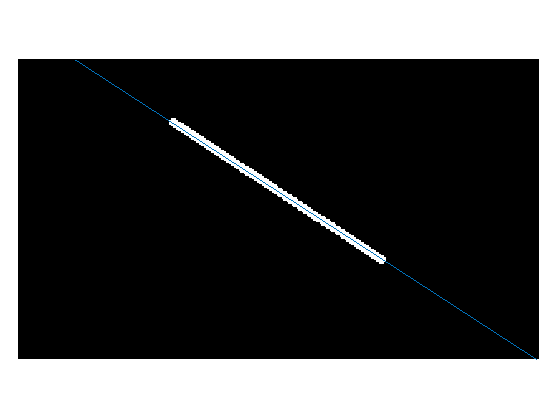

In [4]:
clc; clear; close all
pkg load image
A=imread('images/linea1.jpg');
%Convertir la imagen en binaria
B=im2double(A);
B(B<0.5)=0; B(B>=0.5)=1;
imshow(B)

%Calcular la discretizacion de theta y rho
%1. Theta: Tomar valores en [0,180] / [0, pi]
h1=1;
thetas=deg2rad(0:h1:180);
%2. Rho: Toma valores en [-d,d], donde d=sqrt(m^2+n^2), y [m,n]=size(B)
[m,n]=size(B);
d=sqrt(m^2+n^2);
h2=1;
rhos=-d:h2:d;

%Crear matriz de acumulacion
Acumulador=zeros(length(thetas),length(rhos));

%Llenar la matriz de acumulacion

[x_b,y_b]=find(B);

for i=1:length(x_b) %Recorrer los puntos del borde
  for theta_ind=1:length(thetas)
    theta=thetas(theta_ind);
    rho=x_b(i)*cos(theta)+y_b(i)*sin(theta);
    [~,rho_ind]=min(abs(rhos-rho));
    Acumulador(theta_ind,rho_ind)+=1;
  end  
end

%Mostrar graficamente el comportamiento del acumulador
%figure
%surface(thetas,rhos,Acumulador','EdgeColor','none')
%xlabel('rho')
%ylabel('theta')

%Encontrar la posicion donde el Acumulador alcanza el maxima
[xp,yp]=find(Acumulador==max(max(Acumulador)));


%Graficar
thetaMax = thetas(xp);
rhoMax = rhos(yp);

pendiente = -cos(thetaMax)/sin(thetaMax);
interseccion = rhoMax/sin(thetaMax);

%Para graficar una linea recta, se utiliza el comando line
%Necesitamos un dos puntos
%Punto1 (1,y1)
y1 = pendiente*1 + interseccion;
%Punto2 (xn,n)
xn = (n-interseccion)/pendiente;

%Graficar la linea rectangle
line([y1 n], [1 xn], "LineWidth", 2)

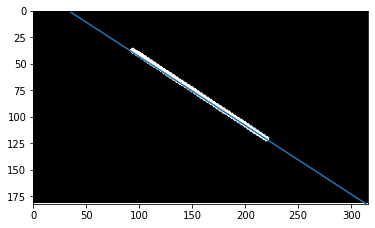

In [5]:
A = Image.open("images/linea1.jpg")
A = np.asarray(A).astype("float64")/255
A = A[:,:,0]
A[A>=0.5]=1
A[A<0.5]=0
plt.imshow(A, cmap=plt.cm.gray)

h1 = 1
thetas = np.deg2rad(np.arange(0,180+h1,h1))

m,n = np.shape(A)
d = np.sqrt(m**2 + n**2)
h2 = 1
rhos = np.arange(-d,d,h2)

Acumulador = np.zeros((len(thetas),len(rhos)))
x_borde,y_borde = np.nonzero(A)

for i in range(len(x_borde)):
    for theta_indice in range(len(thetas)):
        theta = thetas[theta_indice]
        rho = x_borde[i]*np.cos(theta) + y_borde[i]*np.sin(theta)
        rho_indice = np.argmin(np.abs(rhos-rho))
        Acumulador[theta_indice,rho_indice] += 1

xp,yp = np.unravel_index(np.argmax(Acumulador,axis=None),Acumulador.shape)
thetaMax = thetas[xp]
rhoMax = rhos[yp]
pendiente = -np.cos(thetaMax) / np.sin(thetaMax)
interseccion = rhoMax / np.sin(thetaMax)

y1 = pendiente*1 + interseccion
xn = (n-interseccion)/pendiente

plt.plot([y1, n],[1, xn])
plt.xlim([0,n])
plt.ylim([m,0])
plt.show() 

xp =

   181
     1

yp =

   337
   395



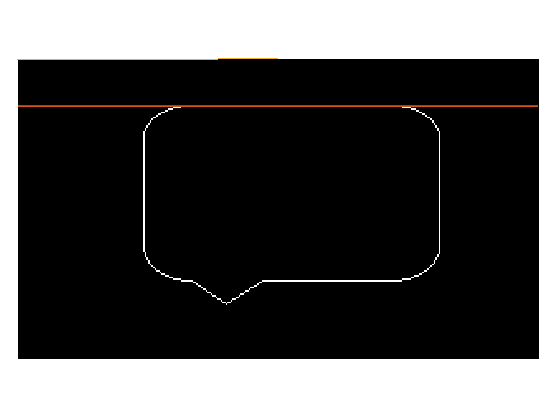

In [6]:
clc; clear; close all
pkg load image
A=imread('images/linea3.jpg');
%Convertir la imagen en binaria
B=im2double(A);
B(B<0.5)=0; B(B>=0.5)=1;
imshow(B)

%Calcular la discretizacion de theta y rho
%1. Theta: Tomar valores en [0,180] / [0, pi]
h1=1;
thetas=deg2rad(0:h1:180);
%2. Rho: Toma valores en [-d,d], donde d=sqrt(m^2+n^2), y [m,n]=size(B)
[m,n]=size(B);
d=sqrt(m^2+n^2);
h2=1;
rhos=-d:h2:d;

%Crear matriz de acumulacion
Acumulador=zeros(length(thetas),length(rhos));

%Llenar la matriz de acumulacion

[x_b,y_b]=find(B);

for i=1:length(x_b) %Recorrer los puntos del borde
  for theta_ind=1:length(thetas)
    theta=thetas(theta_ind);
    rho=x_b(i)*cos(theta)+y_b(i)*sin(theta);
    [~,rho_ind]=min(abs(rhos-rho));
    Acumulador(theta_ind,rho_ind)+=1;
  end  
end

%Mostrar graficamente el comportamiento del acumulador
%figure
%surface(thetas,rhos,Acumulador','EdgeColor','none')
%xlabel('rho')
%ylabel('theta')

%Encontrar la posicion donde el Acumulador alcanza el maxima
[xp,yp]=find(Acumulador==max(max(Acumulador)))
%Observacion: Si el maximo se repite mas de una vez, entonces
%xp y yp son vectores que tienen las posiciones de esos valores

y1 = 0;
xn = 0;

for k=1:length(xp)
    
     %Graficar
     thetaMax = thetas(xp(k));
     rhoMax = rhos(yp(k));
     
     if abs(sin(thetaMax)) < 10^-5 %Linea vertical
          xv = rhoMax/cos(thetaMax);
          line([n 1], [xv xv], "LineWidth",2)
     else
          pendiente = -cos(thetaMax)/sin(thetaMax);
          interseccion = rhoMax/sin(thetaMax);
          
          %Para graficar una linea recta, se utiliza el comando line
          %Necesitamos un dos puntos
          %Punto1 (1,y1)
          y1 = pendiente*1 + interseccion
          %Punto2 (xn,n)
          xn = (n-interseccion)/pendiente
     end

end



%Graficar la linea rectangle
line([y1 n], [1 xn], "LineWidth", 2)

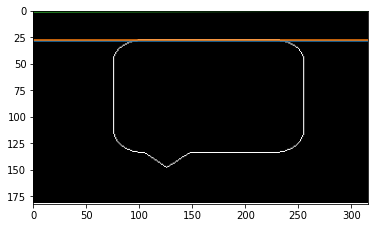

In [7]:
A = Image.open("images/linea3.jpg")
A = np.asarray(A).astype("float64")/255
A = A[:,:,0]
A[A>=0.5]=1
A[A<0.5]=0
plt.imshow(A, cmap=plt.cm.gray)

h1 = 1
thetas = np.deg2rad(np.arange(0,180+h1,h1))

m,n = np.shape(A)
d = np.sqrt(m**2 + n**2)
h2 = 1
rhos = np.arange(-d,d,h2)

Acumulador = np.zeros((len(thetas),len(rhos)))
x_borde,y_borde = np.nonzero(A)

for i in range(len(x_borde)):
    for theta_indice in range(len(thetas)):
        theta = thetas[theta_indice]
        rho = x_borde[i]*np.cos(theta) + y_borde[i]*np.sin(theta)
        rho_indice = np.argmin(np.abs(rhos-rho))
        Acumulador[theta_indice,rho_indice] += 1

        xp,yp = np.where(Acumulador == np.max(np.max(Acumulador)))

y1 = 0
xn = 0

for k in range(len(xp)):
    thetaMax = thetas[xp[k]]
    rhoMax = rhos[yp[k]]

    if (np.abs(np.sin(thetaMax)) < 10**-5):
        xv = rhoMax / np.cos(thetaMax)
        plt.plot([n, 1], [xv, xv])
    else:
        pendiente = -np.cos(thetaMax) / np.sin(thetaMax)
        interseccion = rhoMax / np.sin(thetaMax)

        y1 = pendiente*1 + interseccion
        xn = (n-interseccion)/pendiente

plt.plot([y1, n], [1, xn])



#Mostrar
plt.xlim([0,n])
plt.ylim([m,0])
plt.show()

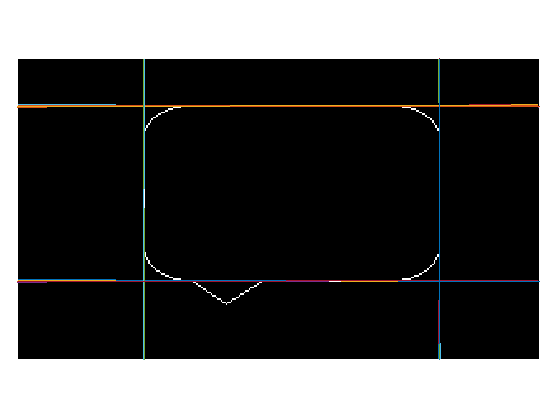

In [8]:
clc; clear; close all
pkg load image
A=imread('images/linea3.jpg');
%Convertir la imagen en binaria
B=im2double(A);
B(B<0.5)=0; B(B>=0.5)=1;
imshow(B)

%Calcular la discretizacion de theta y rho
%1. Theta: Tomar valores en [0,180] / [0, pi]
h1=0.1;
thetas=deg2rad(0:h1:180);
%2. Rho: Toma valores en [-d,d], donde d=sqrt(m^2+n^2), y [m,n]=size(B)
[m,n]=size(B);
d=sqrt(m^2+n^2);
h2=0.1;
rhos=-d:h2:d;

%Crear matriz de acumulacion
Acumulador=zeros(length(thetas),length(rhos));

%Llenar la matriz de acumulacion

[x_b,y_b]=find(B);

for i=1:length(x_b) %Recorrer los puntos del borde
  for theta_ind=1:length(thetas)
    theta=thetas(theta_ind);
    rho=x_b(i)*cos(theta)+y_b(i)*sin(theta);
    [~,rho_ind]=min(abs(rhos-rho));
    Acumulador(theta_ind,rho_ind)+=1;
  end  
end

%Mostrar graficamente el comportamiento del acumulador
%figure
%surface(thetas,rhos,Acumulador','EdgeColor','none')
%xlabel('rho')
%ylabel('theta')

lineas_intentos=10;

for r=1:lineas_intentos
  %Encontrar maxima posicion del Acumulador
  [xp,yp]=find(Acumulador==max(max(Acumulador)));
  %Observacion: Si el maximo se repite mas de una vez, entonces 
  %             'x' y 'y' son vectores que tienen las posiciones

  %Graficar

  for k=1:length(xp)
    thetaMax=thetas(xp(k));
    rhoMax=rhos(yp(k));

    if abs(sin(thetaMax))<10^-4
      x_v=rhoMax/cos(thetaMax);
      line([n 1], [x_v x_v],'LineWidth',2)  
    else
      %Calcular pendiente
      pendiente=-cos(thetaMax)/sin(thetaMax);
      interseccion=rhoMax/sin(thetaMax);
      %Necesitamos el punto (1,y1)
      y1=pendiente*1+interseccion;
      %Necesitamos el punto (m,ym)
      ym=pendiente*m+interseccion;
      %Necesitamos el punto (x1,1)
      x1=(1-interseccion)/pendiente;
      %Necesitamos el punto (xn,n)
      xn=(n-interseccion)/pendiente;
      if pendiente>0
        if 0<y1
          line([y1 n], [1 xn],'LineWidth',2)  
        else
          line([1 ym], [x1 m],'LineWidth',2)  
        end    
      else
        if y1>m
          line([ym n], [m xn],'LineWidth',2)  
        else
          line([y1 1], [1 x1],'LineWidth',2)  
        end    
      end  
    end
    Acumulador(xp(k),yp(k))=0;
  end
end

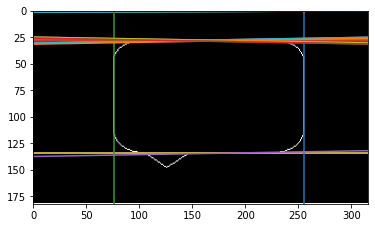

In [9]:
A = Image.open("images/linea3.jpg")
A = np.asarray(A).astype("float64")/255
A = A[:,:,0]
A[A>=0.5]=1
A[A<0.5]=0
plt.imshow(A, cmap=plt.cm.gray)

h1 = 1
thetas = np.deg2rad(np.arange(0,180+h1,h1))


m,n = np.shape(A)
d = np.sqrt(m**2 + n**2)
h2 = 1
rhos = np.arange(-d,d,h2)

Acumulador = np.zeros((len(thetas),len(rhos)))
x_borde,y_borde = np.nonzero(A)

for i in range(len(x_borde)):
    for theta_indice in range(len(thetas)):
        theta = thetas[theta_indice]
        rho = x_borde[i]*np.cos(theta) + y_borde[i]*np.sin(theta)
        rho_indice = np.argmin(np.abs(rhos-rho))
        Acumulador[theta_indice,rho_indice] += 1


lineas_intentos = 10

for r in range(lineas_intentos):
    #HAY UN PROBLEMA AQUI
    #XP RETORNA UN UNICO NUMERO Y DEBERIA RETORNAR UN ARRAY
    xp,yp = np.where(Acumulador == np.max(np.max(Acumulador)))

    y1 = 0
    xn = 0

    for k in range(len(xp)):
        thetaMax = thetas[xp[k]]
        rhoMax = rhos[yp[k]]

        if (np.abs(np.sin(thetaMax)) < 10**-5):
            xv = rhoMax / np.cos(thetaMax)
            plt.plot([n, 1], [xv, xv])
        else:
            pendiente = -np.cos(thetaMax) / np.sin(thetaMax)
            interseccion = rhoMax / np.sin(thetaMax)

            y1 = pendiente*1 + interseccion
            ym = pendiente*m + interseccion

            x1 = (1-interseccion)/pendiente
            xn = (n-interseccion)/pendiente

            if (pendiente > 0):
                if (0 < y1):
                    plt.plot([y1, n], [1, xn])
                else:
                    plt.plot([1, ym], [x1, m])
            else:
                if (y1 > m):
                    plt.plot([ym, n], [m, xn])
                else:
                    plt.plot([y1, 1], [1 , x1])

    plt.plot([y1, n], [1, xn])
    Acumulador[xp[k],yp[k]]=0;

plt.xlim([0,n])
plt.ylim([m,0])
plt.show() 

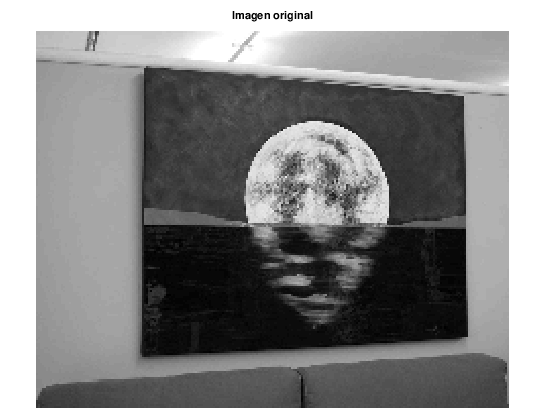

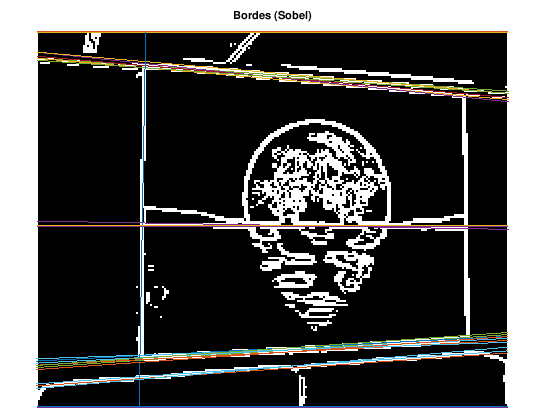

In [10]:
clc; clear; close all
pkg load image

%Paso 0: Cargar Imagen
A=imread('images/cuadro.jpg');
A=imresize(A,floor(size(A)/4));
imshow(A)
title("Imagen original")

%Paso 1: Obtener una imagen binaria con los bordes de la imagen original
A = im2double(A);
%Operador de Sobel (Mascaras)
Bx=[-1 0 1; -2 0 2; -1 0 1];
By=[-1 -2 -1; 0 0 0; 1 2 1];
%Realizar la convolucion
Cx = conv2(A,Bx,'same');
Cy = conv2(A,By,'same');
C = sqrt(Cx.^2+Cy.^2);
%Convertir a binario
C(C<0.5) = 0;
C(C>=0.5) = 1;
figure
imshow(C)
title("Bordes (Sobel)")

B = C;

%Calcular la discretizacion de theta y rho
%1. Theta: Tomar valores en [0,180] / [0, pi]
h1=1;
thetas=deg2rad(0:h1:180);
%2. Rho: Toma valores en [-d,d], donde d=sqrt(m^2+n^2), y [m,n]=size(B)
[m,n]=size(B);
d=sqrt(m^2+n^2);
h2=1;
rhos=-d:h2:d;

%Crear matriz de acumulacion
Acumulador=zeros(length(thetas),length(rhos));

%Llenar la matriz de acumulacion

[x_b,y_b]=find(B);

for i=1:length(x_b) %Recorrer los puntos del borde
  for theta_ind=1:length(thetas)
    theta=thetas(theta_ind);
    rho=x_b(i)*cos(theta)+y_b(i)*sin(theta);
    [~,rho_ind]=min(abs(rhos-rho));
    Acumulador(theta_ind,rho_ind)+=1;
  end  
end

%Mostrar graficamente el comportamiento del acumulador
%figure
%surface(thetas,rhos,Acumulador','EdgeColor','none')
%xlabel('rho')
%ylabel('theta')

lineas_intentos=20;

for r=1:lineas_intentos
  %Encontrar maxima posicion del Acumulador
  [xp,yp]=find(Acumulador==max(max(Acumulador)));
  %Observacion: Si el maximo se repite mas de una vez, entonces 
  %             'x' y 'y' son vectores que tienen las posiciones

  %Graficar

  for k=1:length(xp)
    thetaMax=thetas(xp(k));
    rhoMax=rhos(yp(k));

    if abs(sin(thetaMax))<10^-4
      x_v=rhoMax/cos(thetaMax);
      line([n 1], [x_v x_v],'LineWidth',2)  
    else
      %Calcular pendiente
      pendiente=-cos(thetaMax)/sin(thetaMax);
      interseccion=rhoMax/sin(thetaMax);
      %Necesitamos el punto (1,y1)
      y1=pendiente*1+interseccion;
      %Necesitamos el punto (m,ym)
      ym=pendiente*m+interseccion;
      %Necesitamos el punto (x1,1)
      x1=(1-interseccion)/pendiente;
      %Necesitamos el punto (xn,n)
      xn=(n-interseccion)/pendiente;
      if pendiente>0
        if 0<y1
          line([y1 n], [1 xn],'LineWidth',2)  
        else
          line([1 ym], [x1 m],'LineWidth',2)  
        end    
      else
        if y1>m
          line([ym n], [m xn],'LineWidth',2)  
        else
          line([y1 1], [1 x1],'LineWidth',2)  
        end    
      end  
    end
    Acumulador(xp(k),yp(k))=0;
  end
end

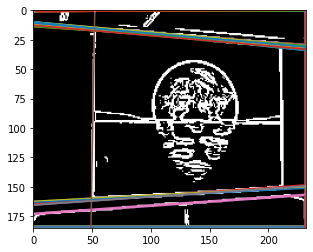

In [11]:
#Cargar Imagen
A = Image.open("images/cuadro.jpg")
A = ImageOps.grayscale(A)
A = A.resize((A.size[0]//4,A.size[1]//4))
A = np.asarray(A).astype("float64")/255

# #Sobel
Cx = sobel(A,axis=0, mode="constant")
Cy = sobel(A,axis=1, mode="constant")
C = np.sqrt(np.square(Cx) + np.square(Cy))
T = 0.5
C[C<T] = 0
C[C>=T] = 1
plt.imshow(C, cmap =plt.cm.gray)

A = C


h1 = 1
thetas = np.deg2rad(np.arange(0,180+h1,h1))


m,n = np.shape(A)
d = np.sqrt(m**2 + n**2)
h2 = 1
rhos = np.arange(-d,d,h2)

Acumulador = np.zeros((len(thetas),len(rhos)))
x_borde,y_borde = np.nonzero(A)

for i in range(len(x_borde)):
    for theta_indice in range(len(thetas)):
        theta = thetas[theta_indice]
        rho = x_borde[i]*np.cos(theta) + y_borde[i]*np.sin(theta)
        rho_indice = np.argmin(np.abs(rhos-rho))
        Acumulador[theta_indice,rho_indice] += 1


lineas_intentos = 20

for r in range(lineas_intentos):
    #HAY UN PROBLEMA AQUI
    #XP RETORNA UN UNICO NUMERO Y DEBERIA RETORNAR UN ARRAY
    xp,yp = np.where(Acumulador == np.max(np.max(Acumulador)))

    y1 = 0
    xn = 0

    for k in range(len(xp)):
        thetaMax = thetas[xp[k]]
        rhoMax = rhos[yp[k]]

        if (np.abs(np.sin(thetaMax)) < 10**-5):
            xv = rhoMax / np.cos(thetaMax)
            plt.plot([n, 1], [xv, xv])
        else:
            pendiente = -np.cos(thetaMax) / np.sin(thetaMax)
            interseccion = rhoMax / np.sin(thetaMax)

            y1 = pendiente*1 + interseccion
            ym = pendiente*m + interseccion

            x1 = (1-interseccion)/pendiente
            xn = (n-interseccion)/pendiente

            if (pendiente > 0):
                if (0 < y1):
                    plt.plot([y1, n], [1, xn])
                else:
                    plt.plot([1, ym], [x1, m])
            else:
                if (y1 > m):
                    plt.plot([ym, n], [m, xn])
                else:
                    plt.plot([y1, 1], [1 , x1])

    plt.plot([y1, n], [1, xn])
    Acumulador[xp[k],yp[k]]=0;

plt.xlim([0,n])
plt.ylim([m,0])
plt.show() 